In [ ]:
'''
fft.ipynb v0.1
last update 2/22/24
created by DA'''

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import pandas as pd


# settings
plt.style.use('classic')

In [ ]:
# sampling rate
sr = 2000

# sampling interval
interval = 1.0 / sr
time = np.arange(0,1, interval)

In [ ]:
# build input wave

amp = 3
hz = 1
x = amp * np.sin(2*np.pi*hz*time)

amp = 1
hz = 4
x += amp * np.sin(2*np.pi*hz*time)

amp = 0.5
hz = 7
x += amp * np.sin(2*np.pi*hz*time)


In [ ]:
# plot input wave

plt.figure()
plt.plot(time,x)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.grid(True)
plt.show()

In [ ]:
# fourier transform signal
X = fft(x) # array
N = len(X) # int
n = np.arange(N) # array
T = N/sr # float
freq = n/T # array

In [ ]:
df = pd.DataFrame({'X':X, 'n':n, 'freq':freq})
df

In [ ]:
# sub plot signal vs fourier transform
plt.figure(figsize = (12,6)) #figsize is important for clean graph
plt.suptitle("FOURIER TRANSFORMATION OF REWIND TENSION")

# first subplot - original signal
plt.subplot(121)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(time,x)


# second subplot - fourier transform
plt.subplot(122)
plt.xlabel('Frequency')
plt.ylabel('FFT Amplitude')
plt.xlim(0,10)
plt.grid(True)
plt.stem(freq, np.abs(X), 'r', markerfmt='')


# output graph
plt.show()


In [2]:
# read electricity demand
df = pd.read_csv('./electricitydemand.csv', delimiter=',', parse_dates=[1])
df.rename(columns={'Timestamp (Hour Ending)':'hour',
          'Demand (MWh)':'demand'}, inplace=True)
df

C:\Users\0156263\AppData\Local\Temp\ipykernel_13276\4283265657.py:2: FutureWarning: Parsed string "1/30/2024 12 a.m. CST" included an un-recognized timezone "CST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df = pd.read_csv('./electricitydemand.csv', delimiter=',', parse_dates=[1])
C:\Users\0156263\AppData\Local\Temp\ipykernel_13276\4283265657.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('./electricitydemand.csv', delimiter=',', parse_dates=[1])
C:\Users\0156263\AppData\Local\Temp\ipykernel_13276\4283265657.py:2: FutureWarning: Parsed string "1/30/2024 1 a.m. CST" included an un-recognized timezone "CST". Dropping unrecognized timezones is deprecated; in a future version this wil

,Region Code,hour,demand,Demand Forecast (MWh),Net Generation (MWh),Total Interchange (MWh)
0,MIDW,2024-01-30 00:00:00,77629.0,78611,79168.0,-969.0
1,MIDW,2024-01-30 01:00:00,76138.0,76955,78429.0,-88.0
2,MIDW,2024-01-30 02:00:00,75163.0,76939,76868.0,-606.0
3,MIDW,2024-01-30 03:00:00,74449.0,76771,76173.0,-463.0
4,MIDW,2024-01-30 04:00:00,74659.0,77507,76710.0,-116.0
...,...,...,...,...,...,...
547,MIDW,2024-02-21 19:00:00,79209.0,81948,NaN,NaN
548,MIDW,2024-02-21 20:00:00,78508.0,81361,NaN,NaN
549,MIDW,2024-02-21 21:00:00,76683.0,79600,NaN,NaN
550,MIDW,2024-02-21 22:00:00,73594.0,77429,NaN,NaN


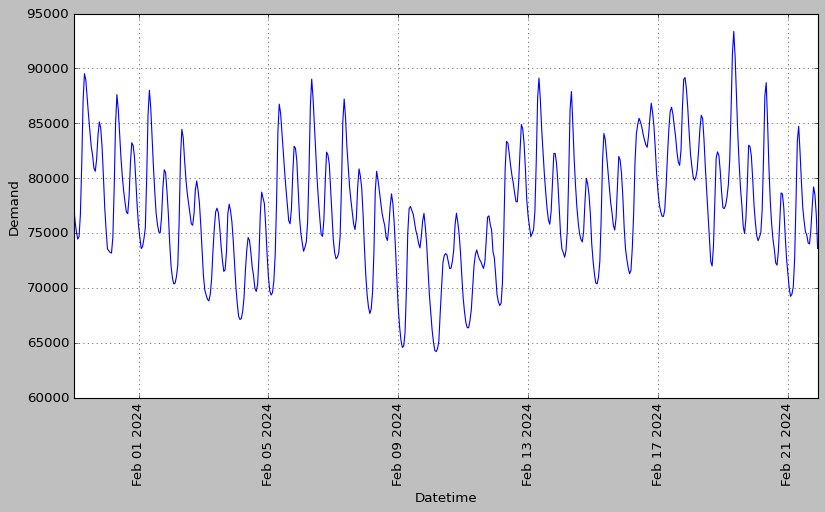

In [3]:
# plot midwest electricity demand

plt.figure(figsize=(12,6))
plt.xlabel('Datetime')
plt.ylabel('Demand')
plt.grid(True)
plt.xticks(rotation=90)
plt.plot(df['hour'], df['demand'])

plt.show()

In [4]:
df['demand']

0      77629.0
1      76138.0
2      75163.0
3      74449.0
4      74659.0
        ...   
547    79209.0
548    78508.0
549    76683.0
550    73594.0
551        NaN
Name: demand, Length: 552, dtype: float64

In [9]:
df.dropna(subset=['demand'], inplace = True)
df['demand']

0      77629.0
1      76138.0
2      75163.0
3      74449.0
4      74659.0
        ...   
546    77430.0
547    79209.0
548    78508.0
549    76683.0
550    73594.0
Name: demand, Length: 551, dtype: float64

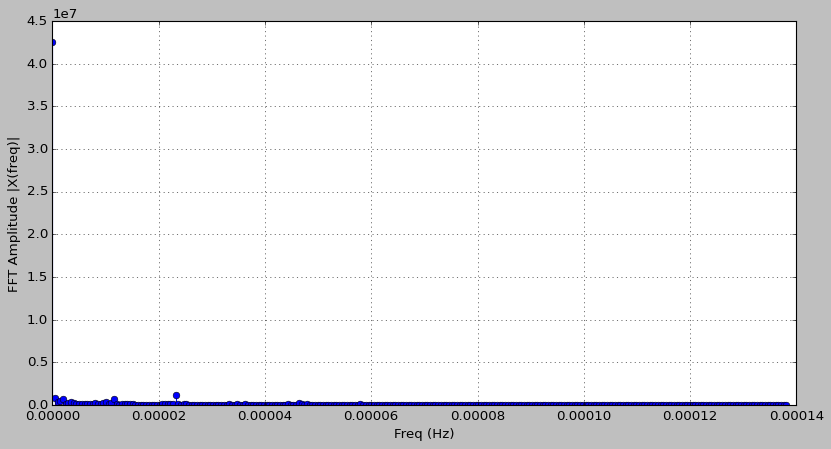

In [18]:
# === FOURIER TRANSFORM ELECTRICITY DEMAND SIGNAL ===
# STUDY THIS! 2/21/24, Wednesday Night

# i needed to convert the pandas series to a numpy array for this to work
# CAUTION
X = fft(np.array(df['demand'])) # array

N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / (60*60)
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.stem(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.grid(True)
plt.show()


C:\Users\0156263\AppData\Local\Temp\ipykernel_13276\3056042651.py:4: RuntimeWarning: divide by zero encountered in divide
  t_h = 1/f_oneside / (60 * 60)


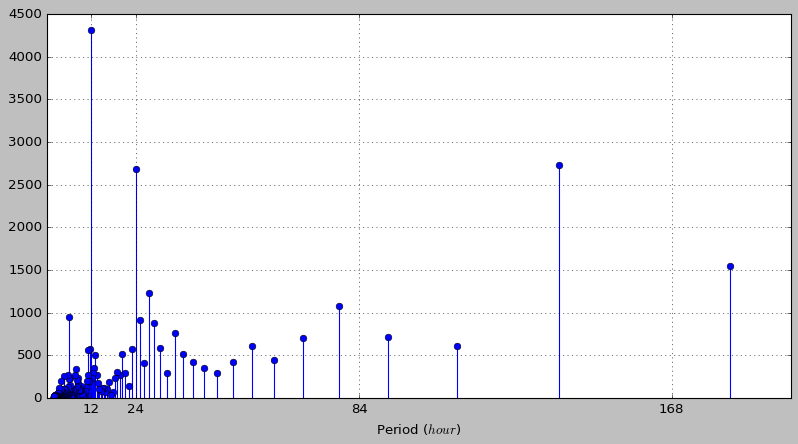

In [19]:
# STUDY THIS BLOCK

# convert frequency to hour
t_h = 1/f_oneside / (60 * 60)

plt.figure(figsize=(12,6))
plt.stem(t_h, np.abs(X[:n_oneside])/n_oneside)
plt.xticks([12, 24, 84, 168])
plt.xlim(0, 200)
plt.xlabel('Period ($hour$)')
plt.grid(True)
plt.show()

In [ ]:
# sub plot signal vs fourier transform
plt.figure(figsize = (12,6)) #figsize is important for clean graph
plt.suptitle("FOURIER TRANSFORMATION OF MIDWEST ELECTRICITY DEMAND")

# first subplot - original signal
plt.subplot(121)
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(time,x)


# second subplot - fourier transform
plt.subplot(122)
plt.xlabel('Frequency')
plt.ylabel('FFT Amplitude')
plt.xlim(0,10)
plt.grid(True)
plt.stem(freq, np.abs(X), 'r', markerfmt='')


# output graph
plt.show()

In [1]:
1000/60

16.666666666666668

In [2]:
100/60


1.6666666666666667

In [3]:
1000/60


16.666666666666668

In [4]:
10000/60

166.66666666666666

In [5]:
166.66/60

2.7776666666666667